In [1]:
import matplotlib.pyplot as plt
import scipy.sparse as sp
import _pickle as pk

from helpers import load_data
from collaborativeFiltering import *
from cross_validation import k_fold_split, split_matrix

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def save(obj, path):
    print('Saving at path : {}'.format(path))
    pk.dump(obj, open(path, 'wb'))
    print('Done')
    
def load(path):
    return pk.load(open(path, 'rb'))

# Load data

In [3]:
path_dataset = "../data/data_train.csv"
ratings = load_data(path_dataset)

In [5]:
pred = load_data("../data/films_CF_train_inf.csv")
print(RMSE(pred, ratings))

0.826964679649


In [6]:
user_pred = load_data('../data/users_CF_prediction_inf.csv')
film_pred = load_data('../data/films_CF_prediction_inf.csv')

In [7]:
mean = 0.5 * (user_pred + film_pred)

In [8]:
sortTrainData('../data/mean_prediction_inf.csv', mean)

# Test with film standard deviation

In [40]:
denseRatings = sparseToDense(ratings)
boolViewings = booleanViewings(ratings)
_, film_means, _filmstdDevs = normalizeRatings(np.transpose(denseRatings), np.transpose(boolViewings))

In [44]:
normRatings, userMeans, userStdDevs = normalizeRatings(denseRatings, boolViewings)

In [46]:
similarities, user_commonViewings = buildGraph(normRatings, boolViewings, _filmstdDevs)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


In [47]:
neighbors = buildNeighbors(user_commonViewings)
sorted_neighbors = sortNeighbors(neighbors, similarities)

0
100
200
300
400
500
600
700
800
900


In [48]:
nF, nU = ratings.shape
model = {'nF': nF, 'nU': nU, 'boolViewings': boolViewings, 'denseRatings': denseRatings, 'normRatings': normRatings, 'userMeans': userMeans, 'userStdDevs': userStdDevs, 'similarities': similarities, 'user_commonViewings': user_commonViewings, 'sorted_neighbors': sorted_neighbors}

In [49]:
save(model, 'model_users_stdDev.pkl')

Saving at path : model_users_stdDev.pkl
Done


In [50]:
k_list = [10]
usersModel_predictionErrorsOverk(k_list, model)

k=10:
User #1
User #101
User #201
User #301
User #401
User #501
User #601
User #701
User #801
No (correlated) neighbors have seen the film
User #901
Train RMSE : 
0.983224118581


([0.98322411858108993], [])

In [51]:
create_prediction_file_usersModel('../data/users_CF_prediction_inf_stdDev.csv', testSet, model, k=1000)

In [52]:
create_prediction_file_usersModel('../data/users_CF_train_inf_stdDev.csv', trainSet, model, k=1000)

No (correlated) neighbors have seen the film


In [53]:
pred_stdDev = load_data('../data/users_CF_train_inf_stdDev.csv')

In [54]:
print(RMSE(pred_stdDev, ratings))

0.968044970045


# Build model

In [20]:
model = load('model_users_full.pkl')
print('Model loaded')
neighbors = buildNeighbors(model['user_commonViewings'])
print('Neighbors built')
model['sorted_neighbors'] = sortNeighbors(neighbors, model['similarities'])
print('Neighbors sorted')
del model['similarities']
del model['user_commonViewings']
save(model, 'prediction_model_users_log.pkl')
print('Done')

Model loaded
Neighbors built
0
100
200
300
400
500
600
700
800
900
Neighbors sorted
Saving at path : prediction_model_users_log.pkl
Done
Done


In [21]:
k_list = [10]
usersModel_predictionErrorsOverk(k_list, model)

k=10:
User #1
User #101
User #201
User #301
User #401
User #501
User #601
User #701
User #801
No (correlated) neighbors have seen the film
User #901
Train RMSE : 
0.984700760059


([0.98470076005947116], [])

In [22]:
k_list = [10]
model_noLog = load('model_users_full.pkl')
usersModel_predictionErrorsOverk(k_list, model_noLog)

k=10:
User #1
User #101
User #201
User #301
User #401
User #501
User #601
User #701
User #801
No (correlated) neighbors have seen the film
User #901
Train RMSE : 
0.985897586662


([0.98589758666174621], [])

In [23]:
test_path = '../data/sample_submission.csv'
testSet = load_data(test_path)

In [24]:
create_prediction_file_usersModel('../data/users_CF_prediction_inf_log.csv', testSet, model, k=1000)

In [34]:
pred_log = load_data('../data/users_CF_train_inf_log.csv')
pred = load_data('../data/users_CF_train_inf.csv')

In [35]:
print(RMSE(pred, ratings))

0.958251574942


In [36]:
print(RMSE(pred_log, ratings))

0.969935371829


In [37]:
print(RMSE(pred_log, pred))

0.0812713219727


In [25]:
train_path = '../data/data_train.csv'
trainSet = load_data(train_path)

In [33]:
create_prediction_file_usersModel('../data/users_CF_train_inf_log.csv', trainSet, model, k=1000)

No (correlated) neighbors have seen the film


In [8]:
model = buildModel(ratings)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


In [9]:
save(model, 'model_users_full.pkl')

# Prediction

In [10]:
model = load('model_users_full.pkl')

In [15]:
k_list = [10]
trainingErrorOverk_(k_list, model)

k=10:
User #1
User #101
User #201
User #301
User #401
User #501
User #601
User #701
User #801
No (correlated) neighbors have seen the film
User #901
Train RMSE : 
1.0301879223


[1.0301879222962205]

# Cross validation

In [16]:
folds = k_fold_split(ratings, min_num_ratings=0, k=4)

In [7]:
models = []
trainSets = []
testSets = []
for k in range(4):
    print('Building model for fold #{}/{}'.format(k+1, 4))
    train, test = split_matrix(ratings, folds[k])
    print('Train non zero :')
    print(train.nnz)
    print('Test non zero :')
    print(test.nnz)
    trainSets.append(train)
    testSets.append(test)
    m = buildModel(train)
    models.append(m)

Building model for fold #1/4
Train non zero :
882714
Test non zero :
294238
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
Building model for fold #2/4
Train non zero :
882714
Test non zero :
294238
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
74

In [8]:
np.sum(model['boolViewings'], axis=0)

array([  340.,   531.,   792.,  3164.,  1243.,  4347.,  1124.,  3404.,
         510.,  2622.,  1171.,   520.,   440.,  3986.,  1422.,   839.,
        1047.,   694.,   675.,  1244.,  1882.,  1356.,   692.,   642.,
         610.,  2482.,   699.,   532.,   894.,   773.,   275.,  2042.,
        1175.,   964.,  1135.,   265.,  1249.,   720.,   167.,  1256.,
          48.,   867.,   752.,  1647.,  2622.,  4258.,   248.,  1038.,
         222.,   524.,  2846.,   248.,   987.,   360.,  1152.,   162.,
         827.,    78.,  2546.,  4094.,  2466.,   604.,   985.,   598.,
         718.,   519.,   406.,  1881.,  1595.,   466.,  1851.,  1715.,
         136.,   675.,   281.,  2421.,  1172.,   952.,   901.,   402.,
         557.,   374.,   321.,  2909.,   784.,  1561.,   667.,  1099.,
        2855.,   980.,   777.,  1173.,  1223.,  2412.,  3001.,   505.,
         383.,   549.,  1488.,   742.,  1270.,  2537.,   994.,   469.,
        1356.,  3015.,   654.,   528.,   612.,   332.,   372.,   898.,
      

In [10]:
k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
train_errors = []
test_errors = []
for fold in range(4):
    print('Fold #{}/{}'.format(fold + 1, 4))
    tr_error, te_error = trainingErrorOverk(k_list, models[fold], testSets[fold])
    train_errors.append(tr_error)
    test_errors.append(te_error)

Fold #1/4
k=1:
User #1
User #101
User #201
User #301
User #401
User #501
User #601
User #701
User #801
User #901
Train RMSE : 
1.39478863197
No (correlated) neighbors have seen the film
Test RMSE : 
1.46207183809
k=2:
User #1
User #101
User #201
User #301
User #401
User #501
User #601
User #701
User #801
User #901
Train RMSE : 
1.22093633938
No (correlated) neighbors have seen the film
Test RMSE : 
1.29930680637
k=3:
User #1
User #101
User #201
User #301
User #401
User #501
User #601
User #701
User #801
User #901
Train RMSE : 
1.14153325498
No (correlated) neighbors have seen the film
Test RMSE : 
1.22262999544
k=4:
User #1
User #101
User #201
User #301
User #401
User #501
User #601
User #701
User #801
User #901
Train RMSE : 
1.09732887948
No (correlated) neighbors have seen the film
Test RMSE : 
1.17870618326
k=5:
User #1
User #101
User #201
User #301
User #401
User #501
User #601
User #701
User #801
User #901
Train RMSE : 
1.06884360519
No (correlated) neighbors have seen the film
Te

In [15]:
tr_e = np.array(train_errors)
te_e = np.array(test_errors)

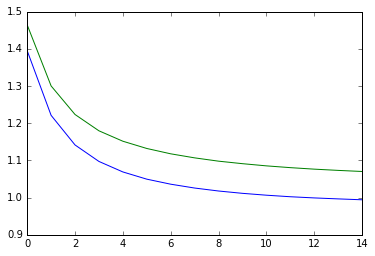

In [19]:
plt.plot(np.mean(tr_e, axis=0))
plt.plot(np.mean(te_e, axis=0))

In [22]:
a = np.array([[1, 2, 3,], [4, 5, 6]])
print(a.transpose())

[[1 4]
 [2 5]
 [3 6]]


In [5]:
model_films_full = buildFilmsModel(ratings)
print('Model built')
save(model_films_full, 'model_films_full.pkl')

Preprocessing data
Building graph
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
Model built
Model built
Saving at path : model_films_full.pkl
Done


In [9]:
neighbors = buildNeighbors(model_films_full['film_commonViewings'])

In [12]:
sortNeighbors(neighbors, model_films_full['similarities'])

0
100
200
300
400
500



KeyboardInterrupt


In [18]:
save(neighbors, 'neighbors_temp.pkl')

Saving at path : neighbors_temp.pkl
Done


In [3]:
model_films_full = load('model_films_full.pkl')
neighbors = load('neighbors_temp.pkl')
sortedNeighbors = sortNeighbors(neighbors, model_films_full['similarities'])
save(sortedNeighbors, 'sortedNeighbors.pkl')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
Saving at path : sortedNeighbors.pkl
Done


In [17]:
trainSets = []
testSets = []
for k in range(4):
    print('Building model for fold #{}/{}'.format(k+1, 4))
    train, test = split_matrix(ratings, folds[k])
    print('Train non zero :')
    print(train.nnz)
    print('Test non zero :')
    print(test.nnz)
    trainSets.append(train)
    testSets.append(test)
    m = buildFilmsModel(train)
    save(m, 'model_films_{}.pkl'.format(k+1))
    del m

Building model for fold #1/4
Train non zero :
882714
Test non zero :
294238
0
100
200
300
400
500
600
700
800
900
Building model for fold #2/4
Train non zero :
882714
Test non zero :
294238
0
100


KeyboardInterrupt: 

In [3]:
model_films = load('model_films_full.pkl')
del model_films['denseRatings']
del model_films['boolViewings']
del model_films['normRatings']
del model_films['userMeans']
del model_films['userStdDevs']
del model_films['film_commonViewings']
neighbors = load('neighbors_temp.pkl')

In [4]:
sortedNeighbors = sortNeighbors(neighbors, model_films['similarities'], 0, 10000)
save(sortedNeighbors, 'sortedNeighbors.pkl')
del sortedNeighbors

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
Saving at path : sortedNeighbors.pkl
Done
